Question 7
---
The formula for $\mu_{\mu}$ in terms of $I_{\mu}$ and $r_{uk}$ is $$\mu_{\mu}=\frac{\sum_{i\, \in\, I_{u}}^{} r_{ui}}{len(I_{u})}$$

Question 8
---
It means the set of item indices that both user u and v have rated.

Question 9
---
If one user will rate all items highly or poorly, then the absolute rates can not reflect the true rate for the items, and thus the relative rates matter in such case.

Question 10
---

load the data set from the file

In [1]:
import os
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans

file_path = os.path.expanduser('../ml-latest-small/ratings.csv')
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file(file_path, reader = reader)

The template for knn filter is as follows:

In [8]:
sim_options = {'name': 'pearson'}

def knn_coll_filter(data, sim_options = sim_options, cv = 10, x = range(2, 101, 2)):
    sim_options = sim_options
    avg_rmse = [0] * len(x)
    avg_mae = [0] * len(x)
    for k in x:
        algo = KNNWithMeans(k, sim_options = sim_options)
        a = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = cv)
        test_rmse = a['test_rmse']
        test_mae = a['test_mae']
        avg_rmse[k / 2 - 1] = sum(test_rmse) / len(test_rmse)
        avg_mae[k / 2 - 1] = sum(test_mae) / len(test_mae)
        print k / 2 - 1
        print avg_rmse[k / 2 - 1]
        print avg_mae[k / 2 - 1]
    return x, avg_rmse, avg_mae

So for Question 10, we could just use the data from the *ratings.csv* and pass it into the `knn_coll_filter()`:

In [3]:
x, avg_rmse, avg_mae = knn_coll_filter(data)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
0
1.0508301943801377
0.8097970462043504
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
10
0.9208935698993678
0.7026747266984961
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
C

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
20
0.9175085125164836
0.699250866953024
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
30
0.9180886379675892
0.6995626961639909
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
C

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
40
0.9179292107376533
0.6997047554619731
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity ma

From the above, we can get the average RMSE, `avg_rmse` and the average MAE, `avg_mae`, and now we can plot using these data

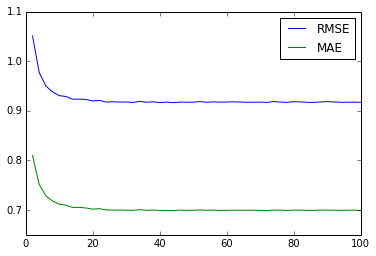

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x, avg_rmse, label='RMSE')
plt.plot(x, avg_mae, label='MAE')
plt.legend()
plt.show()

Question 11
---
Thus we can conclude from the plots that **the minimum k is 22**

Question 12
---

The templete for filtering the trimmed data

In [32]:
from surprise.model_selection import KFold
from surprise import accuracy

x = range(2, 101, 2)

# the trim function is used to process the testset
# by default the trim function don't do anything
def knn_filter_trim(trim = lambda x : x):
    n_splits = 10
    kf = KFold(n_splits = n_splits)
    rmse_list = []
    for k in x:
        rmse = 0
        algo = KNNWithMeans(k, sim_options = sim_options)
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            testset = trim(testset)
            prediction = algo.test(testset)
            rmse += accuracy.rmse(prediction)
        rmse_list.append(rmse / n_splits)
    return rmse_list

Using the template above, for Question 12-14 we could just write their corresponding *trim function* and use this to process the testset.

In [ ]:
# the trim function for popular movie trimming
# delete the movie which has received less than or equal to 2 ratings
# each item in testset is represented by (userId, movieId, rating)
# this trim function can be used by Question 12 and 13
def trim(testset, trim_condition = lambda x : x <= 2):
    movie_map = dict()
    for i in testset:
        movie = i[1]
        movie_map[movie] = 1 if (movie not in movie_map) else movie_map[movie] + 1
    for movie_id in movie_map:
        # meaning that this item should be trimmed
        if trim_condition(movie_map[movie_id]):
            testset = filter(lambda x: x[1] != movie_id, testset)
    return testset
        
def trim_popular(testset):
    return trim(testset)

rmse_popular_list = knn_filter_trim(trim_popular)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0636
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0481
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0336
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0426
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0475
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0376
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0281
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0524
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0587
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0405
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9524
Computing 

Done computing similarity matrix.
RMSE: 0.8628
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8838
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8768
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8889
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8875
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8856
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8879
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8897
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8784
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8857
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8864
Computing the pearson similarity matrix...
Done compu

Done computing similarity matrix.
RMSE: 0.8642
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8846
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8888
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8771
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8745
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8843
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8867
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8675
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8710
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8847
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8860
Computing the pearson similarity matrix...
Done compu

RMSE: 0.8901
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8798
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8704
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8535
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8831
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8802
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8869
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8668
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8730
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8897
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8708
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.87

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8831
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8869
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8756
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8690
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8800
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8708
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8781
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8900
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8855
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8709
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8675
Computing 

Done computing similarity matrix.
RMSE: 0.8802
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8756
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8769
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8913
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8730
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8779
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8672
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8629
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8827
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8722
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8686
Computing the pearson similarity matrix...
Done compu

And we can use the `rmse_popular_list` to evaluate the performance on the trimmed popular movie set.

In [31]:
plt.plot(x, rmse_popular_list, label='RMSE')
plt.legend()
plt.show()

[2]


Question 13
---
The difference between Question 12 and Question 13 is just the parameter `trim_condition` in the `trim()`

In [ ]:
def trim_unpopular(testset):
    return trim(testset, trim_condition = lambda x : x > 2)

rmse_unpopular_list = knn_filter_trim(trim_unpopular)

And we can use the `rmse_unpopular_list` to evaluate the performance on the trimmed unpopular movie set.

In [ ]:
plt.plot(x, rmse_unpopular_list, label='RMSE')
plt.legend()
plt.show()

Question 14
---

In [ ]:
def trim_high_variance(testset):
    movie_map = dict()
    for (user, movie, rate) in movie_map:
        if (movie in movie_map):
            movie_map[movie].append(rate)
        else:
            movie_map[movie] = [rate]
    for movie_id in movie_map:
        rating = movie_map[movie_id]
        if len(rating) < 5 or np.var(np.array(rating)) < 2:
            testset = filter(lambda x: x[1] != movie_id, testset)
    return testset 

And the trimming for the high variance movie trimmed test set can be implemented by the above method.

In [ ]:
rmse_high_variance_list = knn_filter_trim(trim_high_variance)

The plot of the rmse_unpopular_list is as follows:

In [ ]:
plt.plot(x, rmse_high_variance_list, label='RMSE')
plt.legend()
plt.show()